In [7]:
import sympy as sym
from IPython.display import display
# ###################################################################
def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    # alpha = # completar
    alpha =[0]*(n+1)
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z  += [alpha[i] - h[i - 1] * z[i - 1] / l[i]]

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]# = completar
        print(j, a, b, c[j], d)
        S  = a + b * (x - xs[j]) + c[j] * (x - xs[j])**2 + d * (x - xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

In [6]:
xs = [0, 1, 2]
ys = [-5, -4, 3]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 -4 -5.0 18.0 -6.0
0 -5 -5.0 0.0 6.0


6.0*x**3 - 5.0*x - 5

-5.0*x - 6.0*(x - 1)**3 + 18.0*(x - 1)**2 + 1.0

______


6.0*x**3 - 5.0*x - 5

-6.0*x**3 + 36.0*x**2 - 59.0*x + 25.0

#### Grafico 1

1 5 10.0 -18.0 6.0
0 1 10.0 0.0 -6.0


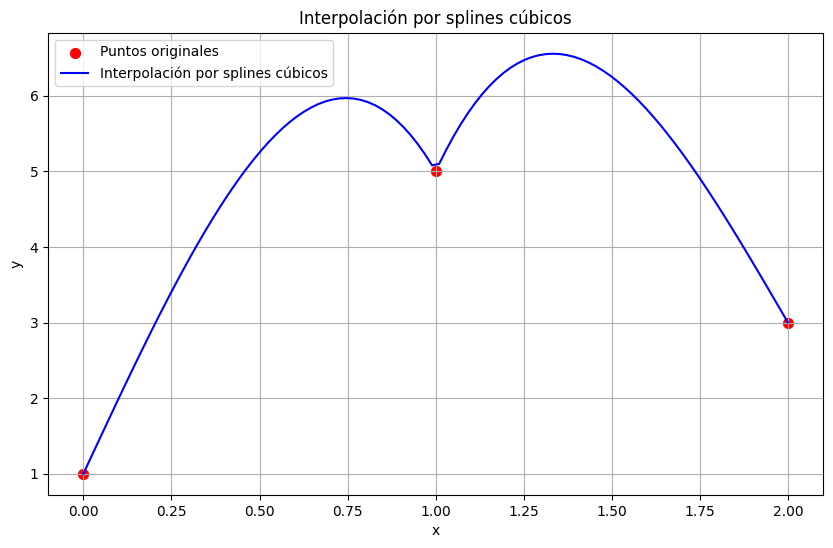

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# Definimos las coordenadas que quieres comprobar
xs = [0, 1, 2]
ys = [1, 5, 3]

# Generamos los splines usando la función que ya tienes
splines = cubic_spline(xs=xs, ys=ys)

# Ahora vamos a graficar
fig, ax = plt.subplots(figsize=(10, 6))

# Graficamos los puntos originales
ax.scatter(xs, ys, color='red', s=50, label='Puntos originales')

# Graficamos los splines
x = sym.Symbol('x')
x_vals = np.linspace(min(xs), max(xs), 100)
y_vals = []

# Para cada valor x, evaluamos el spline correspondiente
for x_val in x_vals:
    # Determinamos qué spline usar
    idx = 0
    for i in range(len(xs)-1):
        if xs[i] <= x_val <= xs[i+1]:
            idx = i
            break

    # Convertimos la expresión simbólica a una función numérica y evaluamos
    spline_func = sym.lambdify(x, splines[idx])
    y_vals.append(spline_func(x_val))

ax.plot(x_vals, y_vals, 'b-', label='Interpolación por splines cúbicos')

# Configuramos el gráfico
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Interpolación por splines cúbicos')
ax.grid(True)
ax.legend()

plt.show()

In [12]:
# Verificación numérica
for i, coord in enumerate(zip(xs, ys)):
    x_val, y_expected = coord
    spline_func = sym.lambdify(x, splines[min(i, len(splines)-1)])
    y_calculated = spline_func(x_val)
    print(f"Punto ({x_val}, {y_expected}): Valor calculado = {y_calculated}")

Punto (0, 1): Valor calculado = 1.0
Punto (1, 5): Valor calculado = 5.0
Punto (2, 3): Valor calculado = 3.0


#Grafico 2